In [76]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
warnings.filterwarnings('ignore')


# 导入、分析数据

In [77]:
train = pd.read_csv('/Users/sagawithme/Documents/GitHub/selfstudy/input/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
test = pd.read_csv('/Users/sagawithme/Documents/GitHub/selfstudy/input/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [81]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 缺失值填充

In [83]:
fare_mean = train['Fare'].mean()
test.loc[pd.isnull(test.Fare),'Fare'] = fare_mean 

embarked_mode = train['Embarked'].mode()
train.loc[pd.isnull(train.Embarked),['Embarked']] = embarked_mode[0]

train.loc[pd.isnull(train.Age),['Age']] = train['Age'].mean()
test.loc[pd.isnull(test.Age),['Age']] = train['Age'].mean()

# 数据分割

In [84]:
label = train['Survived']
train.drop('Survived',axis=1,inplace=True)

X_train,X_test,Y_train,Y_test = train_test_split(train,label,test_size = 0.3,random_state = 1)

X_train['Survived'] = Y_train
X_test['Survived'] = Y_test  

# Sex特征

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

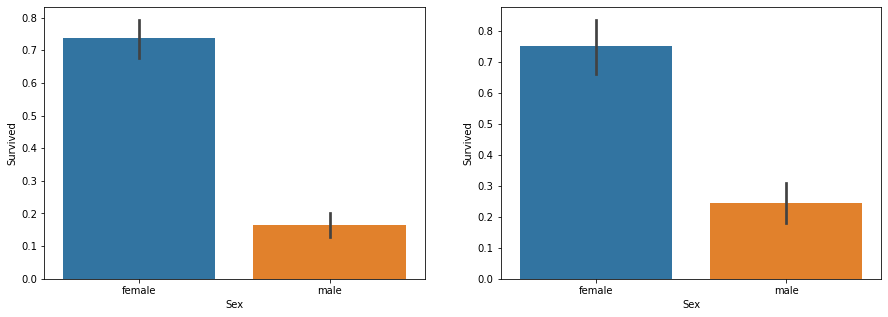

In [85]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Sex', 'Survived', data=X_train, ax=axis1) 
sns.barplot('Sex', 'Survived', data=X_test, ax=axis2) 

In [86]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)

train = pd.get_dummies(data= train,columns=['Sex'])
test = pd.get_dummies(data= test,columns=['Sex'])
train.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_0,Sex_1
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


# Name特征

In [87]:
def Name_Title_Code(x):
    if x == 'Mr.':
        return 1
    if (x == 'Mrs.') or (x=='Ms.') or (x=='Lady.') or (x == 'Mlle.') or (x =='Mme'):
        return 2
    if x == 'Miss':
        return 3
    if x == 'Rev.':
        return 4
    return 5

In [88]:
X_train['Name_Title'] = X_train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
X_test['Name_Title'] = X_test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [89]:
X_train.groupby('Name_Title')['Survived'].count()

Name_Title
Capt.        1
Col.         2
Don.         1
Dr.          4
Lady.        1
Major.       1
Master.     27
Miss.      126
Mlle.        1
Mme.         1
Mr.        365
Mrs.        87
Rev.         5
the          1
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Name_Title', ylabel='Survived'>

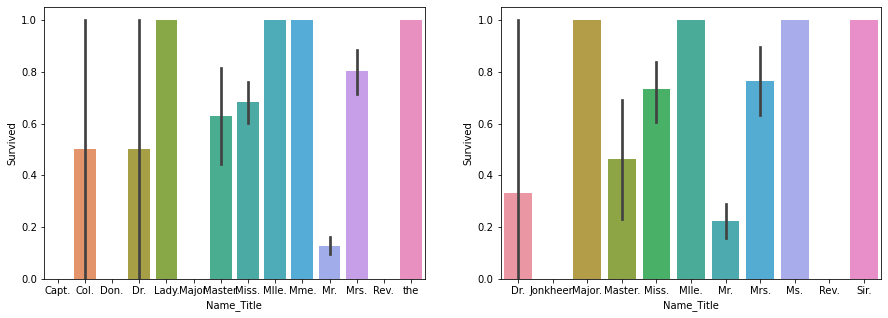

In [90]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Name_Title', 'Survived', data=X_train.sort_values('Name_Title'), ax=axis1) 
sns.barplot('Name_Title', 'Survived', data=X_test.sort_values('Name_Title'), ax=axis2) 

In [91]:
def Name_Title_Code(x):
    if x == 'Mr.':
        return 1
    if (x == 'Mrs.') or (x=='Ms.') or (x=='Lady.') or (x == 'Mlle.') or (x =='Mme'):
        return 2
    if x == 'Miss':
        return 3
    if x == 'Rev.':
        return 4
    return 5

In [92]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test['Name_Title'] = test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

train['Name_Title'] = train['Name_Title'].apply(Name_Title_Code)
test['Name_Title'] = test['Name_Title'].apply(Name_Title_Code)

In [93]:
train = pd.get_dummies(columns = ['Name_Title'], data = train)
test = pd.get_dummies(columns = ['Name_Title'], data = test)

In [94]:
train.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_0,Sex_1,Name_Title_1,Name_Title_2,Name_Title_4,Name_Title_5
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,1,0,0,0


In [95]:
X_train['Name_len'] = X_train['Name'].apply(lambda x: len(x))
X_test['Name_len'] = X_test['Name'].apply(lambda x: len(x))

<AxesSubplot:xlabel='Name_len', ylabel='Survived'>

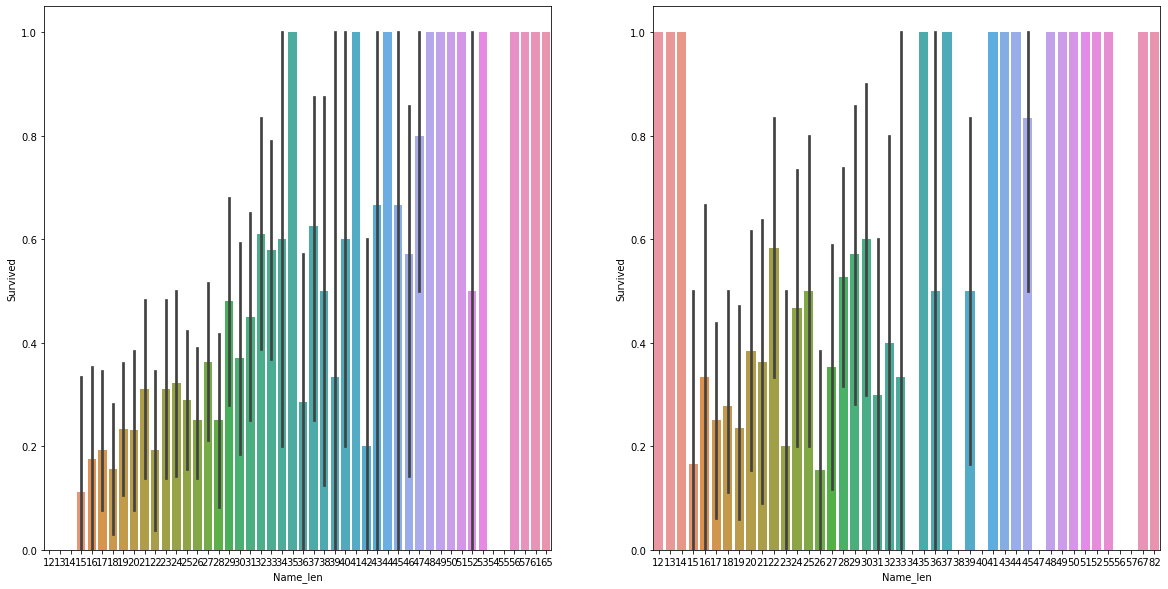

In [96]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot('Name_len', 'Survived', data=X_train.sort_values(['Name_len']), ax=axis1) 
sns.barplot('Name_len', 'Survived', data=X_test.sort_values(['Name_len']), ax=axis2) 

In [97]:
train['Name_len'] = train['Name'].apply(lambda x: len(x))
test['Name_len'] = test['Name'].apply(lambda x: len(x))

# Ticket特征

In [98]:
def Ticket_First_Let(x):
    return x[0]

In [99]:
X_train['Ticket_First_Letter'] = X_train['Ticket'].apply(Ticket_First_Let)
X_test['Ticket_First_Letter'] = X_test['Ticket'].apply(Ticket_First_Let)

In [100]:
X_train.groupby('Ticket_First_Letter')['Survived'].count()

Ticket_First_Letter
1     87
2    129
3    225
4     10
5      2
6      6
7      6
8      1
9      1
A     20
C     32
F      3
L      3
P     49
S     40
W      9
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Ticket_First_Letter', ylabel='Survived'>

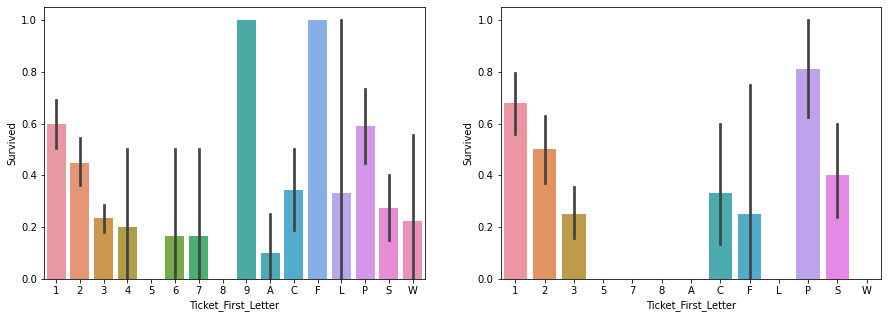

In [101]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Ticket_First_Letter', 'Survived', data=X_train.sort_values('Ticket_First_Letter'), ax=axis1) 
sns.barplot('Ticket_First_Letter', 'Survived', data=X_test.sort_values('Ticket_First_Letter'), ax=axis2) 

In [102]:
def Ticket_First_Letter_Code(x):
    if (x == '1'):
        return 1
    if x == '3':
        return 2
    if x == '4':
        return 3
    if x == 'C':
        return 4
    if x == 'S':
        return 5
    if x == 'P':
        return 6
    if x == '6':
        return 7
    if x == '7':
        return 8
    if x == 'A':
        return 9
    if x == 'W':
        return 10
    return 11

In [103]:
train['Ticket_First_Letter'] = train['Ticket'].apply(Ticket_First_Let)
test['Ticket_First_Letter'] = test['Ticket'].apply(Ticket_First_Let)

train['Ticket_First_Letter'].unique()

array(['A', 'P', 'S', '1', '3', '2', 'C', '7', 'W', '4', 'F', 'L', '9',
       '6', '5', '8'], dtype=object)

In [104]:
test['Ticket_First_Letter'].unique()

array(['3', '2', '7', 'A', '6', 'W', 'S', 'P', 'C', '1', 'F', '4', '9',
       'L'], dtype=object)

In [105]:
train['Ticket_First_Letter'] = train['Ticket_First_Letter'].apply(Ticket_First_Letter_Code)
test['Ticket_First_Letter'] = test['Ticket_First_Letter'].apply(Ticket_First_Letter_Code)

In [106]:
train = pd.get_dummies(columns = ['Ticket_First_Letter'], data = train) 
test = pd.get_dummies(columns = ['Ticket_First_Letter'], data = test) 

# Cabin特征

In [107]:
X_train['Cabin'] = X_train['Cabin'].fillna('Missing')
X_test['Cabin'] = X_test['Cabin'].fillna('Missing')

In [108]:
def Cabin_First_Letter(x):
    if x == 'Missing':
        return 'XX'
    return x[0]

In [109]:
X_train['Cabin_First_Letter'] = X_train['Cabin'].apply(Cabin_First_Letter)
X_test['Cabin_First_Letter'] = X_test['Cabin'].apply(Cabin_First_Letter) 

In [110]:
X_train.groupby('Cabin_First_Letter')['Survived'].count()

Cabin_First_Letter
A      12
B      28
C      41
D      21
E      22
F       8
G       3
XX    488
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Cabin_First_Letter', ylabel='Survived'>

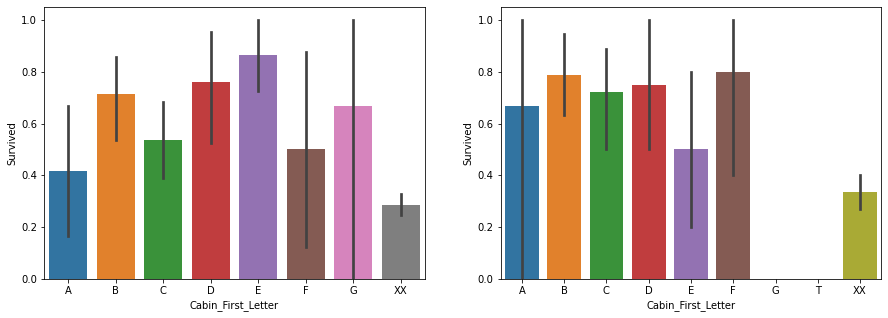

In [111]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Cabin_First_Letter', 'Survived', data=X_train.sort_values('Cabin_First_Letter'), ax=axis1) 
sns.barplot('Cabin_First_Letter', 'Survived', data=X_test.sort_values('Cabin_First_Letter'), ax=axis2) 

In [112]:
def Cabin_First_Letter_Code(x):
    if x == 'XX':
        return 1
    if x == 'B':
        return 2
    if x == 'C':
        return 3
    if x == 'D':
        return 4     
    return 5

In [113]:
train['Cabin'] = train['Cabin'].fillna('Missing')
test['Cabin'] = test['Cabin'].fillna('Missing')

train['Cabin_First_Letter'] = train['Cabin'].apply(Cabin_First_Letter)
test['Cabin_First_Letter'] = test['Cabin'].apply(Cabin_First_Letter) 


In [114]:
train['Cabin_First_Letter'] = train['Cabin_First_Letter'].apply(Cabin_First_Letter_Code)
test['Cabin_First_Letter'] = test['Cabin_First_Letter'].apply(Cabin_First_Letter_Code)

train = pd.get_dummies(columns = ['Cabin_First_Letter'], data = train) 
test = pd.get_dummies(columns = ['Cabin_First_Letter'], data = test) 

# Embarked特征

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

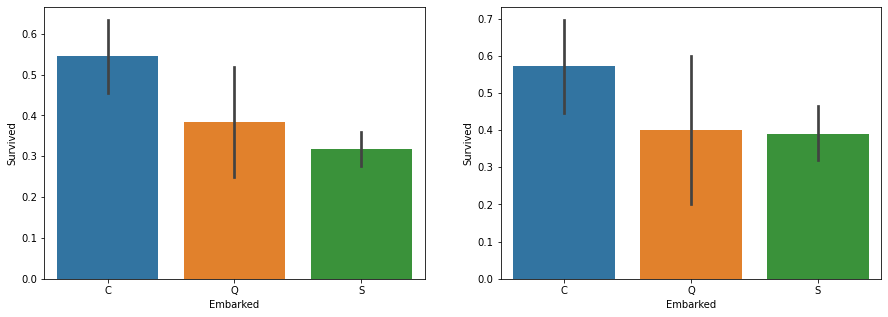

In [115]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Embarked', 'Survived', data=X_train.sort_values('Embarked'), ax=axis1) 
sns.barplot('Embarked', 'Survived', data=X_test.sort_values('Embarked'), ax=axis2) 

In [116]:
train = pd.get_dummies(train,columns = ['Embarked'])
test = pd.get_dummies(test,columns = ['Embarked'])

# SibSp特征

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

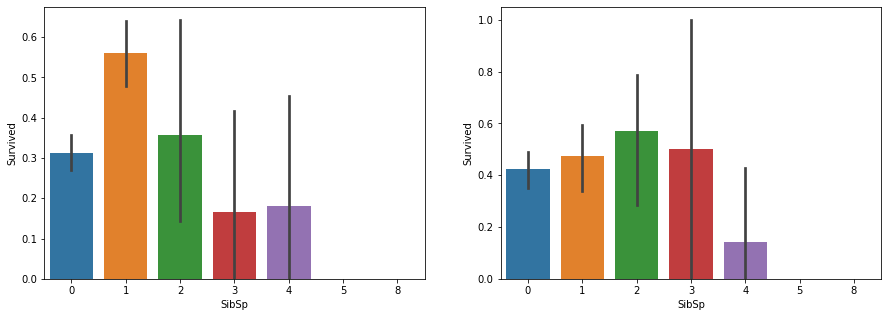

In [117]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('SibSp', 'Survived', data=X_train.sort_values('SibSp'), ax=axis1) 
sns.barplot('SibSp', 'Survived', data=X_test.sort_values('SibSp'), ax=axis2) 

In [118]:
# def SibSp_code(x):
#     if x == 0:
#         return 1
#     if x==3:
#         return 2
#     if x>=4:
#         return 3
#     return 4

In [119]:
# train['SibSp_code'] = train['SibSp'].apply(SibSp_code)
# test['SibSp_code'] = test['SibSp'].apply(SibSp_code)

# train = pd.get_dummies(train,columns = ['SibSp_code'])
# test = pd.get_dummies(test,columns = ['SibSp_code'])

# Parch特征

In [120]:
# X_train.groupby('Parch')['Survived'].count()

In [121]:
# fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
# sns.barplot('Parch', 'Survived', data=X_train.sort_values('Parch'), ax=axis1) 
# sns.barplot('Parch', 'Survived', data=X_test.sort_values('Parch'), ax=axis2) 

In [122]:
# def Parch_code(x):
#     if x == 0:
#         return 1
#     if x>=4:
#         return 2 
#     return 3

In [123]:
# train['Parch_code'] = train['Parch'].apply(Parch_code)
# test['Parch_code'] = test['Parch'].apply(Parch_code)

# train = pd.get_dummies(train,columns = ['Parch_code'])
# test = pd.get_dummies(test,columns = ['Parch_code'])

# SibSp + Parch 特征

In [124]:
X_train['Fam_Size'] = X_train['SibSp']  + X_train['Parch'] 
X_test['Fam_Size'] = X_test['SibSp']  + X_test['Parch'] 

<AxesSubplot:xlabel='Fam_Size', ylabel='Survived'>

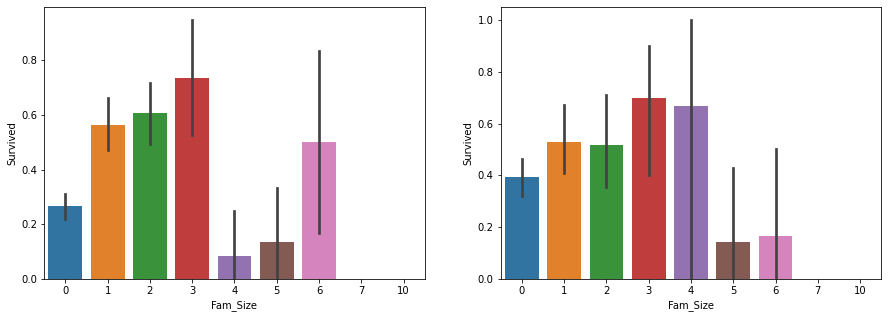

In [125]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Fam_Size', 'Survived', data=X_train.sort_values('Parch'), ax=axis1) 
sns.barplot('Fam_Size', 'Survived', data=X_test.sort_values('Parch'), ax=axis2) 

In [126]:
def Family_feature(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test 
train, test  = Family_feature(train, test)

train = pd.get_dummies(train,columns = ['Fam_Size']) 
test =  pd.get_dummies(test,columns = ['Fam_Size']) 

# Pclass特征

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

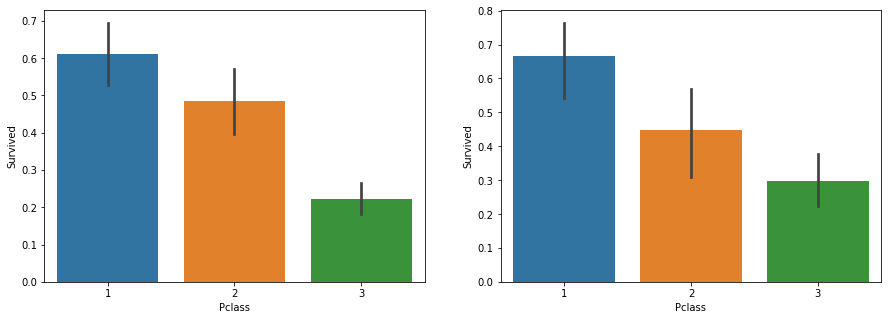

In [127]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Pclass', 'Survived', data=X_train.sort_values('Pclass'), ax=axis1) 
sns.barplot('Pclass', 'Survived', data=X_test.sort_values('Pclass'), ax=axis2) 

In [128]:
train['Pclass_1']  = np.int32(train['Pclass'] == 1)  
train['Pclass_2']  = np.int32(train['Pclass'] == 2)  
train['Pclass_3']  = np.int32(train['Pclass'] == 3)  

test['Pclass_1']  = np.int32(test['Pclass'] == 1)  
test['Pclass_2']  = np.int32(test['Pclass'] == 2)  
test['Pclass_3']  = np.int32(test['Pclass'] == 3)  

# Age特征

<AxesSubplot:ylabel='Density'>

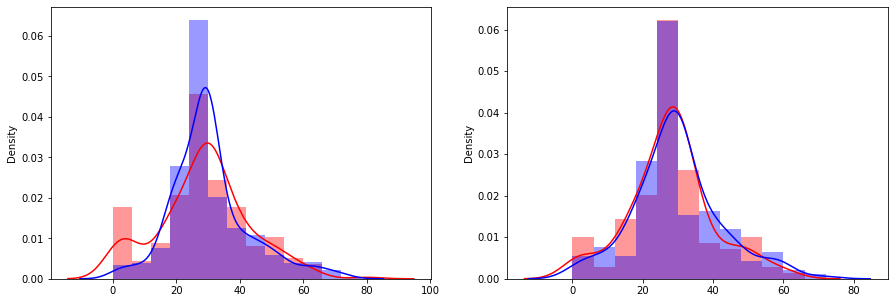

In [129]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5)) 
sns.distplot(X_train[X_train.Survived==1]['Age'].dropna().values, bins=range(0, 81, 6),color='red', ax=axis1) 
sns.distplot(X_train[X_train.Survived==0]['Age'].dropna().values, bins=range(0, 81, 6),color = 'blue', ax=axis1) 

sns.distplot(X_test[X_test.Survived==1]['Age'].dropna().values, bins=range(0, 81, 6),color='red', ax=axis2) 
sns.distplot(X_test[X_test.Survived==0]['Age'].dropna().values, bins=range(0, 81, 6),color = 'blue', ax=axis2) 

In [130]:
train['Small_Age'] = np.int32(train['Age'] <= 5)  
train['Old_Age'] = np.int32(train['Age'] >= 65)  
train['Middle_Age'] = np.int32((train['Age'] >= 15) & (train['Age'] <= 25))  
 
test['Small_Age'] = np.int32(test['Age'] <= 5)  
test['Old_Age'] = np.int32(test['Age'] >= 65)  
test['Middle_Age'] = np.int32((test['Age'] >= 15) & (test['Age'] <= 25))  

# Fare特征

In [131]:
X_train['Fare'] = X_train['Fare'] + 1
X_test['Fare'] = X_test['Fare'] + 1

X_train['Fare'] = X_train['Fare'].apply(np.log)
X_test['Fare'] = X_test['Fare'].apply(np.log)

<AxesSubplot:ylabel='Density'>

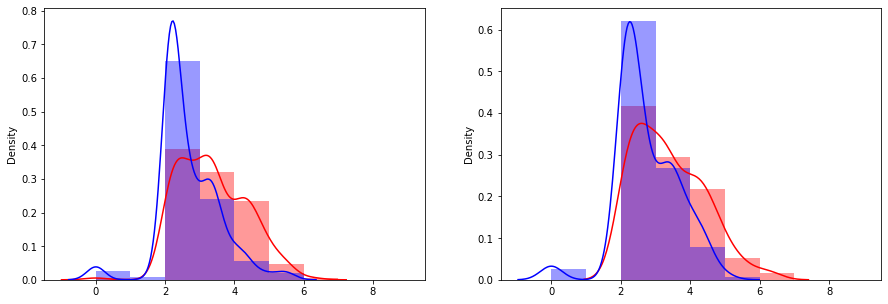

In [132]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5)) 
sns.distplot(X_train[X_train.Survived==1]['Fare'].dropna().values, bins=range(0, 10, 1),color='red', ax=axis1) 
sns.distplot(X_train[X_train.Survived==0]['Fare'].dropna().values, bins=range(0, 10, 1),color = 'blue', ax=axis1) 

sns.distplot(X_test[X_test.Survived==1]['Fare'].dropna().values, bins=range(0, 10, 1),color='red', ax=axis2) 
sns.distplot(X_test[X_test.Survived==0]['Fare'].dropna().values, bins=range(0, 10, 1),color = 'blue', ax=axis2) 

In [133]:
train['Fare'] = train['Fare'] + 1
test['Fare'] = test['Fare'] + 1

train['Fare'] = train['Fare'].apply(np.log)
test['Fare'] = test['Fare'].apply(np.log) 

In [134]:
train['Fare_0_2'] = np.int32(train['Fare'] <= 2)
train['Fare_2_3'] = np.int32((train['Fare'] > 2) & (train['Fare'] <= 3) )
train['Fare_3_4'] = np.int32((train['Fare'] > 3) & (train['Fare'] <= 4) )
train['Fare_4_5'] = np.int32((train['Fare'] > 4) & (train['Fare'] <= 5)) 
train['Fare_5_'] = np.int32(train['Fare'] > 5)


test['Fare_0_2'] = np.int32(test['Fare'] <= 2)
test['Fare_2_3'] = np.int32((test['Fare'] > 2) & (test['Fare'] <= 3) )
test['Fare_3_4'] = np.int32((test['Fare'] > 3) & (test['Fare'] <= 4) )
test['Fare_4_5'] = np.int32((test['Fare'] > 4) & (test['Fare'] <= 5)) 
test['Fare_5_'] = np.int32(test['Fare'] > 5)
 

# 特征选择

In [135]:
train.drop(['Ticket','PassengerId','Name','Age','Cabin','Pclass'],axis = 1, inplace=True)
test.drop( ['PassengerId','Ticket','Name','Age','Cabin','Pclass'],axis =1, inplace=True)     

In [136]:
X_train_ = train.loc[X_train.index]
X_test_ = train.loc[X_test.index]

Y_train_ = label.loc[X_train.index]
Y_test_ = label.loc[X_test.index]

X_test_ = X_test_[X_train_.columns]

In [137]:
pd.set_option('display.max_columns',50)
train.head()

,Fare,Sex_0,Sex_1,Name_Title_1,Name_Title_2,Name_Title_4,Name_Title_5,Name_len,Ticket_First_Letter_1,Ticket_First_Letter_2,Ticket_First_Letter_3,Ticket_First_Letter_4,Ticket_First_Letter_5,Ticket_First_Letter_6,Ticket_First_Letter_7,Ticket_First_Letter_8,Ticket_First_Letter_9,Ticket_First_Letter_10,Ticket_First_Letter_11,Cabin_First_Letter_1,Cabin_First_Letter_2,Cabin_First_Letter_3,Cabin_First_Letter_4,Cabin_First_Letter_5,Embarked_C,Embarked_Q,Embarked_S,Fam_Size_Big,Fam_Size_Nuclear,Fam_Size_Solo,Pclass_1,Pclass_2,Pclass_3,Small_Age,Old_Age,Middle_Age,Fare_0_2,Fare_2_3,Fare_3_4,Fare_4_5,Fare_5_
0,2.110213,0,1,1,0,0,0,23,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,4.280593,1,0,0,1,0,0,51,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,2.188856,1,0,0,0,0,1,22,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,3.990834,1,0,0,1,0,0,44,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,2.202765,0,1,1,0,0,0,24,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [138]:
test = test[train.columns]

# 建模，预测

In [139]:
rf_ = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
#                              max_depth=5,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='auto',  
                             random_state=10,
                             n_jobs=-1) 
rf_.fit(X_train_,Y_train_) 
rf_.score(X_test_,Y_test_)

0.7910447761194029

In [140]:
rf_.fit(train,label) 

RandomForestClassifier(min_samples_split=16, n_estimators=700, n_jobs=-1,
                       random_state=10)

In [141]:
pd.concat((pd.DataFrame(train.columns, columns = ['variable']), 
           pd.DataFrame(rf_.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
1,Sex_0,0.132212
2,Sex_1,0.130267
3,Name_Title_1,0.114805
0,Fare,0.091351
7,Name_len,0.081316
6,Name_Title_5,0.053438
32,Pclass_3,0.046109
4,Name_Title_2,0.035352
19,Cabin_First_Letter_1,0.032268
27,Fam_Size_Big,0.029573


In [143]:
submit = pd.read_csv('/Users/sagawithme/Documents/GitHub/selfstudy/input/gender_submission.csv')
submit.set_index('PassengerId',inplace=True)
res_rf = rf_.predict(test)
submit['Survived'] = res_rf
submit.to_csv('/Users/sagawithme/Documents/GitHub/selfstudy/output/submit.csv')